# Анализ данных Всемирной организации здравохранения

## Часть 3. Анализ данных "Ожидаемой продолжительности жизни при рождении".

**Введение.**  
После того как во второй части мы получили данные по Индикатору *"Life expectancy at birth"*, можно начать анализировать данные.<br>
(Вместо *"Life expectancy at birth"*, можно исследовать любой другой из списка).

В переменной *name* указываем имя файла, в который мы записали данные во второй части. Имена присваиваются согласно названию индикаторов в API сайта ВОЗ.

В переменной *country_name* можно указать любые страны для анализа. В приведенном примере это будут *Албания, Япония, Россия и США*.

В переменной *font_size* указан шрифт для вывода графика.

In [1]:
# Список перемееных
name = "Life expectancy at birth" # Имя файла. Должен соответствовать названию индикатора в API
file_name = "{}.xlsx".format(name)

# Выбор стран для анализа
country_name = ["ALB", "JPN", "RUS", "USA"]

# Выбор пола для анализа
# MLE - мужской
# FMLE - женский
# BTSX - МЖ (оба)
sex_list = ["MLE", "FMLE", "BTSX"]

# Шрифт для графика
font_size = 14

Импортируем необходимые модули.

In [2]:
# Импорт модулей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Создание dataframe.**  
Далее читаем Excel файл и записываем данные в dataframe. При этом переименновываем в читабельные названия столбцов.  
Получаемые столбцы:
- Пол
- Страна
- Год наблюдения
- Возраст (Ожидаемая продолжительность жизни при рождении)

In [3]:
# Оставляем нужные данные, переименновывая столбцы
# Для Life expectancy at birth
# Sex - Пол
# Country - Страна
# Year - Год наблюдения
# Age - Значение ожидаемой продолжительности жизни при рождении
df_all = pd.read_excel(file_name, index_col=0, parse_dates=['Date'])
df = pd.DataFrame({'Sex':df_all['Dim1'],'Country':df_all['SpatialDim'],'Year': df_all['TimeDim'], 'Age': df_all['Value']})

df.head()

,Sex,Country,Year,Age
0,MLE,RWA,2000,43.0
1,FMLE,RWA,2000,48.4
2,BTSX,RWA,2000,45.7
3,MLE,RWA,2001,43.5
4,FMLE,RWA,2001,49.5


In [4]:
df.iloc[0] # Доступ к первому элементу

Sex         MLE
Country     RWA
Year       2000
Age          43
Name: 0, dtype: object

**Создание сводной таблицы.**  
Создаем сводную таблицу, в которой:  
в качестве индекса указываем *Год наблюднеия*  
в качестве столбцов - *Пол* и *Страну*  
в качестве значений - *Ожидаемая продолжительность жизни*

In [5]:
# Создание сводной таблицы.
# Получается таблица с двумя уровнями стоблцов.
# Первый уровень: Пол
# Второй уровень: Страна
table = pd.pivot_table(df, values='Age', index=['Year'], columns=['Sex','Country'])
table.head()

Sex      BTSX                                                        ...  \
Country   AFG   AFR   AGO   ALB   AMR   ARE   ARG   ARM   ATG   AUS  ...   
Year                                                                 ...   
2000     55.9  50.8  47.3  73.1  73.6  74.3  74.0  71.7  72.5  79.6  ...   
2001     56.5   NaN  48.2  74.0   NaN  74.5  74.0  72.2  73.0  80.1  ...   
2002     57.4   NaN  49.4  73.5   NaN  74.7  74.2  72.1  73.4  80.2  ...   
2003     58.0   NaN  50.5  72.9   NaN  74.8  74.2  72.3  73.3  80.6  ...   
2004     58.4   NaN  51.5  73.3   NaN  75.1  74.9  72.6  73.3  80.8  ...   

Sex       MLE                                                        
Country   VCT   VEN   VNM   VUT   WPR   WSM   YEM   ZAF   ZMB   ZWE  
Year                                                                 
2000     68.8  68.2  68.5  67.5  70.8  67.1  59.5  56.1  43.2  44.6  
2001     68.8  68.2  68.8  67.7   NaN  67.4  59.8  55.2  44.0  44.3  
2002     68.9  68.9  69.1  67.9   NaN  67.5  60.3  54.4  44.8  44.0  
2003     68.8  67.8  69.4  68.1   NaN  67.9  60.7  53.6  45.5  44.0  
2004     68.7  68.9  69.6  68.2   NaN  68.4  61.2  53.0  46.7  44.1  

[5 rows x 570 columns]

В таблице получились отдельные данные по годам и странам в зависимости от пола:  
*'MLE'* - мужской,  
*'FMLE'* - женский,  
*'BTSX'* - оба пола (и мужской, и женский вместе)

Описание каждого пола можно получить, указывав его в нижеследующей ячейке.

In [6]:
table['MLE'].apply(pd.DataFrame.describe, axis=1)
# table.apply(pd.Data, axis=1)
# pd.DataFrame.quantile(table['MLE'], q=0.8, axis=1)

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000,190.0,64.032632,9.536107,38.5,57.925,66.90,70.775,77.8
2001,183.0,64.425956,9.467968,39.8,58.000,67.30,71.150,78.2
2002,183.0,64.665027,9.447552,40.4,58.250,67.40,71.300,78.8
2003,183.0,64.899454,9.388686,41.1,58.200,67.80,71.700,79.0
2004,183.0,65.239344,9.285087,42.0,58.800,67.60,71.800,79.2
2005,190.0,65.636579,9.006156,43.1,59.350,68.20,71.900,79.2
2006,183.0,66.068852,8.907650,44.3,60.100,68.70,72.450,79.3
2007,183.0,66.491257,8.643382,45.4,60.550,68.80,72.300,79.5
2008,183.0,66.891257,8.450218,46.3,61.000,68.50,72.500,79.7


**Функция для преобразования пола в читабельный вид:**

In [7]:
# функция для определения заголовка графика в зависимости от пола
def get_title(sex):
    if sex == "MLE":
        sex_id = "мужчин"
    elif sex == "FMLE":
        sex_id = "женщин"    
    elif sex == "BTSX":
        sex_id = "мужчин и женщин"  
    return sex_id

**Построение графиков**  
Для каждого пола строим графики.  
Сначала обращаемся к столбцам, содержащими пол. Затем - к столбцам со странами.

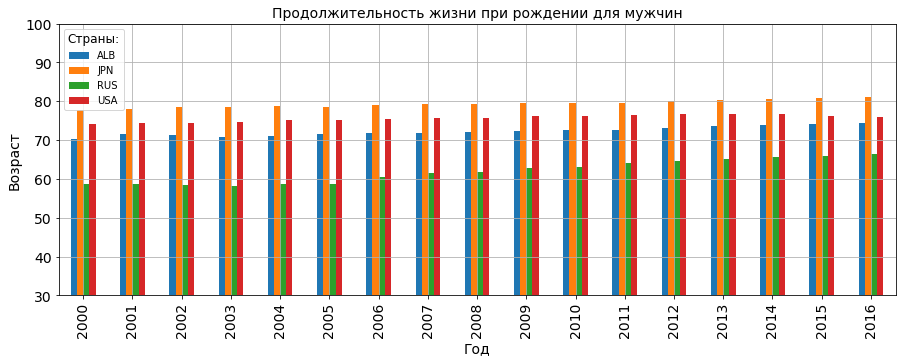

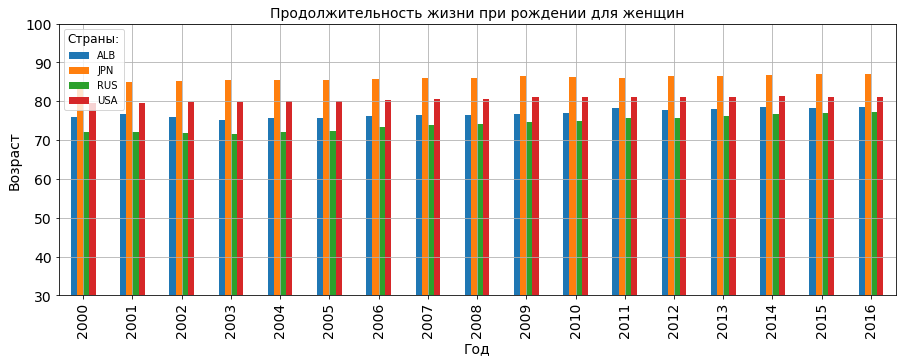

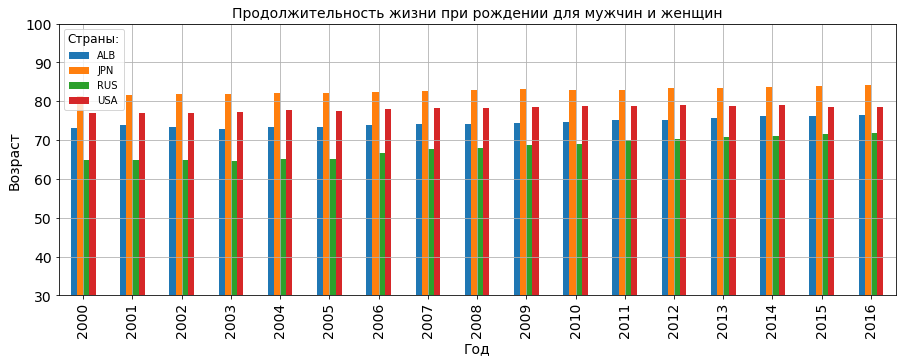

In [8]:
# Разбивка данных на разные графики в зависимости от пола и собственно сами графики
"""
table.xs(sex, axis=1).xs(country_name, axis=1) можно было разбить на
new_table = table.xs(sex, axis=1), т.е. сначала доступ к "родительскому" столбцу, связанным с полом
затем 
new_table.xs(['RUS', 'USA'], axis=1), доступ к "дочерним" столбцам со странами.
"""
for sex in sex_list:

    table.xs(sex, axis=1).xs(country_name, axis=1).plot(kind='bar',
                                                             figsize = (15, 5),
                                                             grid = True,
                                                             ylim = (30, 100),
                                                             fontsize = font_size)
    plt.legend(country_name, title="Страны:", title_fontsize= font_size - 2)
    plt.xlabel('Год', fontsize = font_size)
    plt.ylabel('Возраст', fontsize = font_size)
    sex_id = get_title(sex)
    plt.title('Продолжительность жизни при рождении для {}'.format(sex_id), fontsize = font_size);



**Вывод по общей продолжительности жизни.**  
Удивлен, что продолжительность жизни в Албании выше, чем в России.

**Изучение отдельной страны.**  
Можно также рассмотреть разницу между полами только в одной стране. Для этого нужно указать ее в переменную *single_country*.

In [9]:
# Страна
single_country = 'RUS'

# Используем изначальный датафрейм (до сводных таблиц)
df_country = df[df['Country'] == single_country]
df_country.index = df_country['Year']
df_country.drop(axis = 1, columns="Year")

# Замены непривычных аббревиатур полов.
col         = 'Sex'
conditions  = [ df_country[col] == "MLE", df_country[col] == "FMLE", df_country[col] == 'BTSX' ]
choices     = [ "Men", 'Women', 'Both' ]
df_country[col] = np.select(conditions, choices, default=np.nan)

df_country.head()


C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,Sex,Country,Year,Age
Year,,,,
2000,Men,RUS,2000,58.7
2001,Men,RUS,2001,58.7
2002,Men,RUS,2002,58.5
2003,Men,RUS,2003,58.2
2004,Men,RUS,2004,58.7


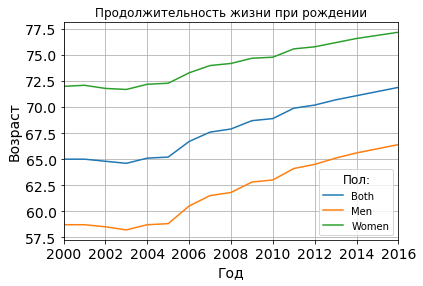

In [10]:
    # Группируем по полу.
    df_country.groupby('Sex')['Age'].plot(grid = True, fontsize = font_size)
    plt.legend(title="Пол:", title_fontsize= font_size - 2)
    plt.xlabel('Год', fontsize = font_size)
    plt.ylabel('Возраст', fontsize = font_size)
    plt.title('Продолжительность жизни при рождении');

**Вывод по России**.  
Ожидаемо продолжительность жизни женщин выше мужчин. Но!  
За 16 лет продолжительность жизни мужчин увеличилась больше, чем у женщин (на **7,7** у мужчин и на **5,2** у женщин).

**Нахождение минимумов по годам**.  

In [11]:
# Нахождения максимума,минимума, квадратили используя все страны. Нанесение на первые графики значений.
value_min = pd.DataFrame()

for sex in sex_list:
    x =table[sex].apply(pd.DataFrame.min, axis=1)
    value_min[sex] = pd.Series(x)

print(value_min)   

       MLE  FMLE  BTSX
Year                  
2000  38.5  40.7  39.8
2001  39.8  42.0  40.9
2002  40.4  43.1  41.7
2003  41.1  43.9  42.5
2004  42.0  44.7  43.4
2005  43.1  45.3  44.2
2006  44.3  46.2  45.2
2007  45.4  47.0  46.2
2008  46.3  47.9  47.1
2009  47.4  48.8  48.1
2010  33.2  40.0  36.2
2011  49.4  50.8  50.2
2012  50.0  51.4  50.7
2013  48.6  51.3  50.0
2014  48.9  50.2  49.6
2015  50.1  52.0  51.4
2016  51.0  53.8  52.9


**Вывод по минимумам.**
Продолжительность жизни населения Земли растет в среднем.
В 2000 году этот показатель составлял меньше 40 лет. К 2016 увеличился на 13 лет.